### Creating our first Neural Network

Steps:
- Graph
- Initiate the session
- Feed Data In and get Output

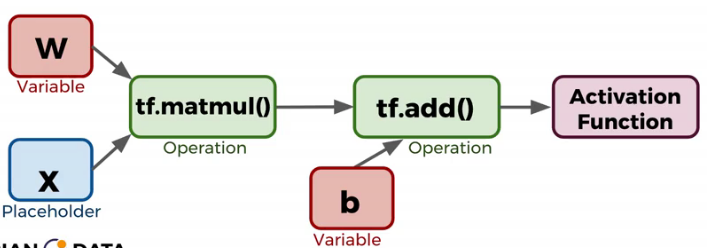

In [1]:
import numpy as np
import tensorflow as tf

In [3]:
#In order to get same random values than ex
np.random.seed(101)
tf.set_random_seed(101)

In [4]:
rand_a = np.random.uniform(0,100,(5,5))

In [6]:
rand_b = np.random.uniform(0,100,(5,1))

In [7]:
a = tf.placeholder(tf.float32)

In [8]:
b = tf.placeholder(tf.float32)

In [9]:
add_op = a + b

In [10]:
mul_op = a * b

In [13]:
with tf.Session() as sess:
    add_result = sess.run(add_op,feed_dict={a:rand_a,b:rand_b})
    print(add_result)
    
    mult_result = sess.run(mul_op,feed_dict={a:rand_a,b:rand_b})
    print(mult_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]
[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


### Example Neural Network

In [14]:
n_features = 10
n_dense_neurons = 3

In [15]:
x = tf.placeholder(tf.float32,(None,n_features))

In [17]:
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

b = tf.Variable(tf.ones([n_dense_neurons]))

In [19]:
xW = tf.matmul(x,W)

In [20]:
z = tf.add(xW,b)

In [21]:
a = tf.sigmoid(z)

In [22]:
init = tf.global_variables_initializer()

In [23]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [24]:
print(layer_out)

[[0.74442047 0.65777755 0.02326283]]


### Simple Regression Example

In [25]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [27]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [28]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

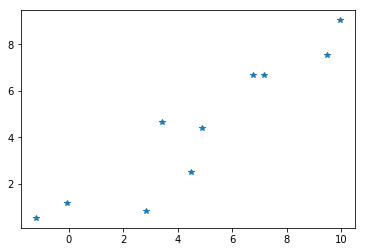

In [30]:
plt.plot(x_data,y_label,'*')

y = mx + b

In [31]:
np.random.rand(2)

array([0.44236813, 0.87758732])

In [32]:
m = tf.Variable(0.44)
b = tf.Variable(0.87)

In [33]:
error = 0

for x,y in zip(x_data,y_label):
    
    y_hat = m*x + b
    
    error += (y-y_hat)**2

In [34]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [35]:
init = tf.global_variables_initializer()

In [39]:
with tf.Session() as sess:
    
    sess.run(init)
    
    training_steps = 100
    
    for i in range(training_steps):
        
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m,b])

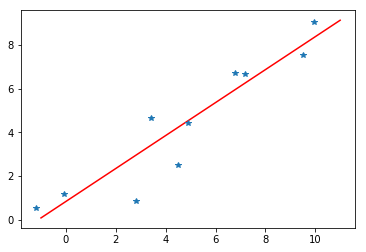

In [40]:
x_test = np.linspace(-1,11,10)

#y = mx + b
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')